<a href="https://colab.research.google.com/github/zzhining/python_ml_dl2/blob/main/answer/9_2_imdb_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 준비


In [1]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets.imdb import load_data

# 파이썬 랜덤 시드 설정
random.seed(42)

# NumPy 랜덤 시드 설정
np.random.seed(42)

# TensorFlow 시드 설정
tf.random.set_seed(42)

num_words = 20000    # 2만 개의 단어만 학습에 활용
(x_train, y_train), (x_test, y_test) = load_data(num_words = num_words)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

# 문제1

불러온 IMDB 데이터 셋의 구성을 이해하기 위해 아래 항목을 확인하시오.
-	`x_train`의 첫번째 아이템의 값과 길이
-	`y_train` 범주의 유형

In [2]:
# 코드 작성

# x_train의 첫번째 아이템의 값
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,

In [3]:
# x_train의 첫번째 아이템의 길이
len(x_train[0])

218

In [4]:
import numpy as np
# y_train 범주의 유형
np.unique(y_train)

array([0, 1])

# 문제2
`x_train`의 길이의 분포를 확인하시오.

<Axes: xlabel='length', ylabel='Count'>

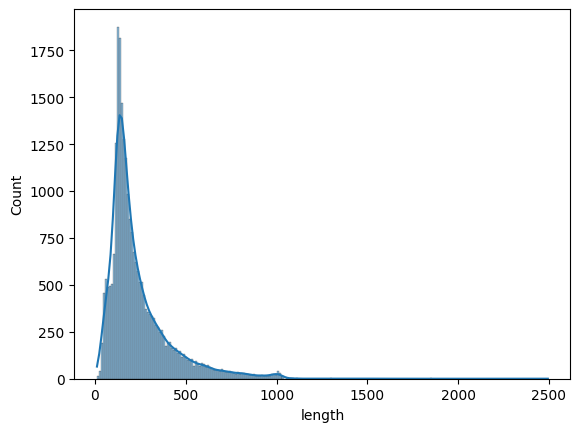

In [5]:
import pandas as pd
import seaborn as sns

# x_train의 분포를 확인하기 위해 x_train의 값과 길이를 담는 데이터 프레임을 생성
df = pd.DataFrame(x_train, columns=['review'])
df['length'] = df['review'].apply(lambda x: len(df['review'][x]))
df['label'] = y_train

# 리뷰의 길이가 담긴 ‘length’컬럼의 분포를 히스토그램으로 확인
sns.histplot(df['length'], kde = True)

In [6]:
df['length'].describe()

,length
count,25000.000000
mean,238.713640
std,176.497204
min,11.000000
25%,130.000000
50%,178.000000
75%,291.000000
max,2494.000000


#문제3
신경망의 입력층은 고정된 크기의 벡터를 입력으로 받기 때문에 `x_train`과 `x_test`의 변수의 길이를 맞추어주는 전처리 작업이 필요하다. 동일한 입력 시퀀스가 신경망의 입력으로 사용될 수 있도록 임계치를 설정하여, 임계치보다 리뷰의 길이가 길 경우에는 데이터를 자르고 임계치보다 짧을 경우에는 제로 패딩(zero padding)을 수행하여 길이를 맞추어 준다. `pad_sequence()`를 사용하여 입력변수의 길이를 300으로 맞추시오.

<힌트>
```
from tensorflow.keras.preprocessing.sequence import pad_sequences
```

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

 # 리뷰 문장 중 300 단어만 활용
maxlen = 300
x_train = pad_sequences(x_train, maxlen = maxlen)
x_test = pad_sequences(x_test, maxlen = maxlen)

x_train.shape, x_test.shape

((25000, 300), (25000, 300))

# 문제4
문제3에서 전처리가 완료된 데이터를 사용하여 인공신경망을 구성하시오.
-	모델의 구성



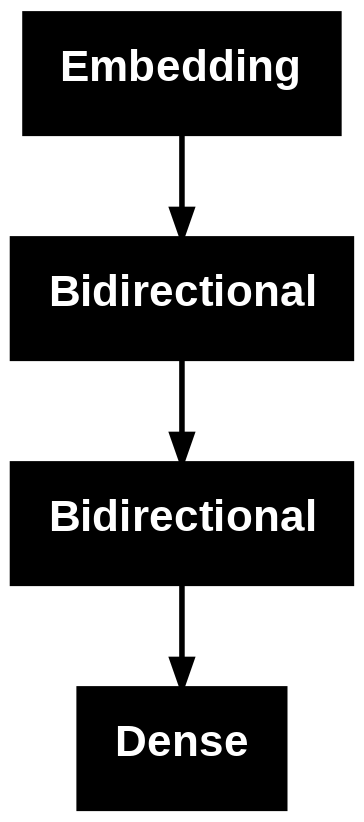


-	Embedding: 입력 데이터를 128 차원으로 임베딩할 것
-	LSTM1: 양방향 LSTM, 256개의 노드를 생성, return_sequences = True
-	LSTM2: 양방향 LSTM, 128개의 노드를 생성

<힌트>
```
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
```

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

model = Sequential()
# 입력 데이터를 128 차원 벡터로 임베딩
model.add(Embedding(num_words, 128))
# 양방향 LSTM
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Bidirectional(LSTM(128)))
# 분류기
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 문제5
문제4에서 생성한 모델의 학습을 수행하시오.
-	학습 시, val_loss 값을 모니터링하여 5회 이상 성능이 개선되지 않을 경우 학습의 이른 종료를 수행할 것
-	학습 데이터의 20%는 검증용 데이터로 할당
-	배치 사이즈: 256, 에포크: 50

In [9]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 학습 결과를 저장하기 위한 환경 설정정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath="./model/{epoch:02d}-{val_loss:.2f}.keras"

# 학습 중 모니터링 할 조건 설정
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True)

# 학습의 이른 종료를 위한 조건 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, batch_size=256, epochs=50,
                    validation_split=0.2,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.6664 - loss: 0.5831
Epoch 1: val_loss improved from inf to 0.36104, saving model to ./model/01-0.36.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 31s 305ms/step - accuracy: 0.6675 - loss: 0.5820 - val_accuracy: 0.8476 - val_loss: 0.3610
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8815 - loss: 0.2934
Epoch 2: val_loss improved from 0.36104 to 0.34490, saving model to ./model/02-0.34.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 313ms/step - accuracy: 0.8817 - loss: 0.2931 - val_accuracy: 0.8488 - val_loss: 0.3449
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9116 - loss: 0.2305
Epoch 3: val_loss did not improve from 0.34490
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 316ms/step - accuracy: 0.9114 - loss: 0.2309 - val_accuracy: 0.8028 - val_loss: 0.4350
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.9147 - loss: 0.2340
Epoch 4: val_loss did not improve from 0.34490
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 3

<Axes: >

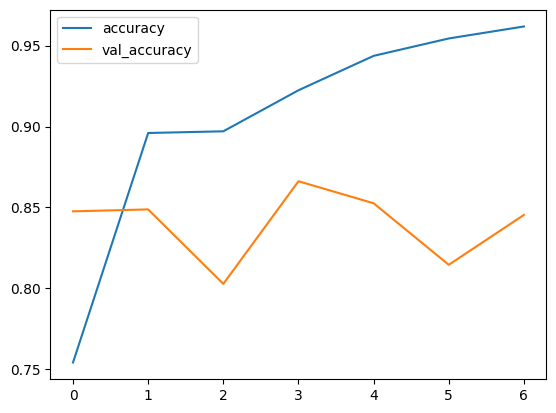

In [10]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

# 문제6
테스트 셋을 사용하여 문제5에서 학습한 모델의 정확도를 확인하시오.

In [11]:
model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8391 - loss: 0.5421


[0.5429378747940063, 0.8398799896240234]

<참고>

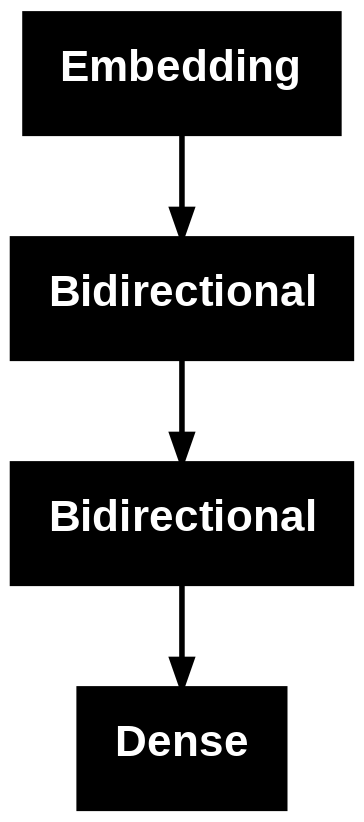

In [12]:
# 모델 구조 plot
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='graph.png')